## Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

## Importing Data from csv

In [2]:
df = pd.read_csv("C:/Workspace/Projects/Insurance premium prediction/artifacts/raw_data.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


## About dataset

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:
df.shape

(1338, 7)

In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [14]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [17]:
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

print(f"Numerical Columns : {num_cols}")
print(f"Categorical Columns : {cat_cols}")


Numerical Columns : ['age', 'bmi', 'children', 'expenses']
Categorical Columns : ['sex', 'smoker', 'region']


In [25]:
df.duplicated().sum()

np.int64(1)

In [26]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [33]:
print(f"Number of unique values in Sex Column is : {df.sex.unique()}")
print(f"Number of unique values in Childern Column is : {df.children.unique()}")
print(f"Number of unique values in Smoker Column is : {df.smoker.unique()}")
print(f"Number of unique values in Region Column is : {df.region.unique()}")


Number of unique values in Sex Column is : ['female' 'male']
Number of unique values in Childern Column is : [0 1 3 2 5 4]
Number of unique values in Smoker Column is : ['yes' 'no']
Number of unique values in Region Column is : ['southwest' 'southeast' 'northwest' 'northeast']


## Insights And Visualization

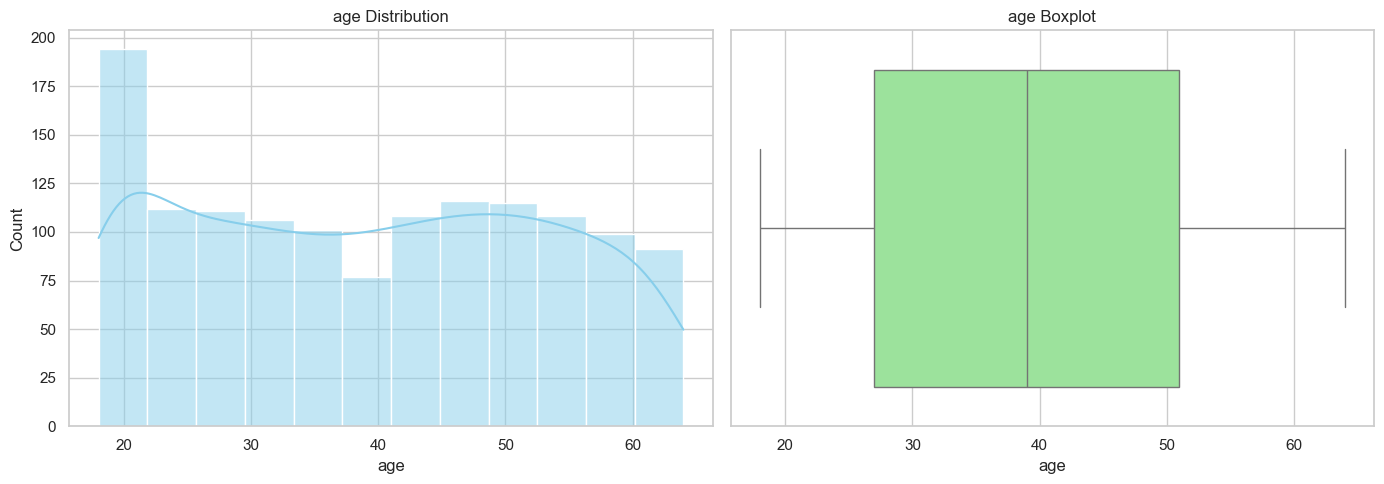

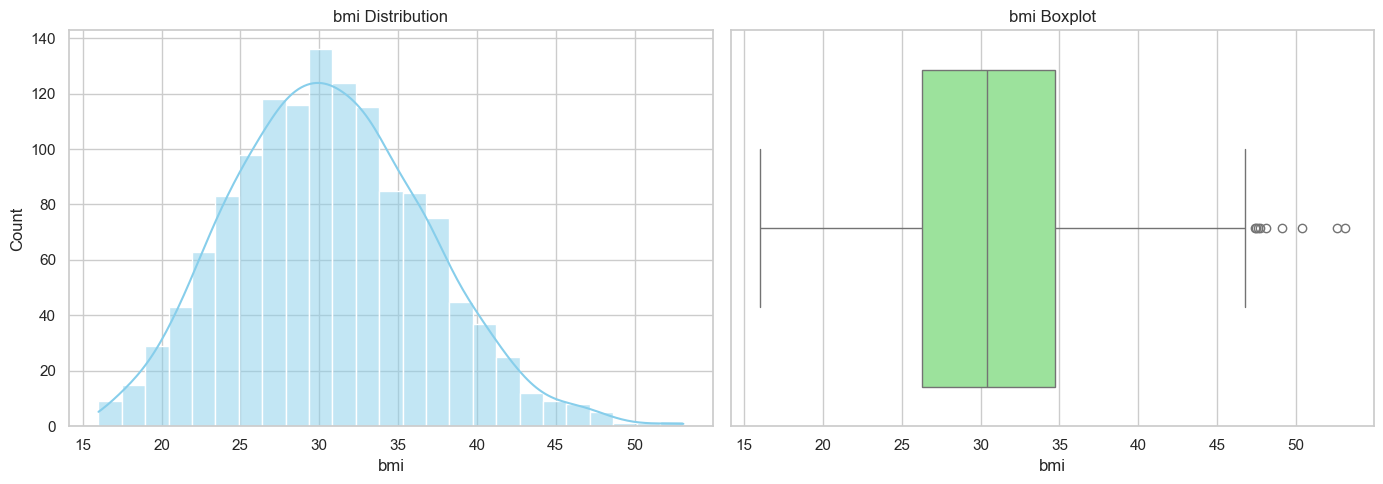

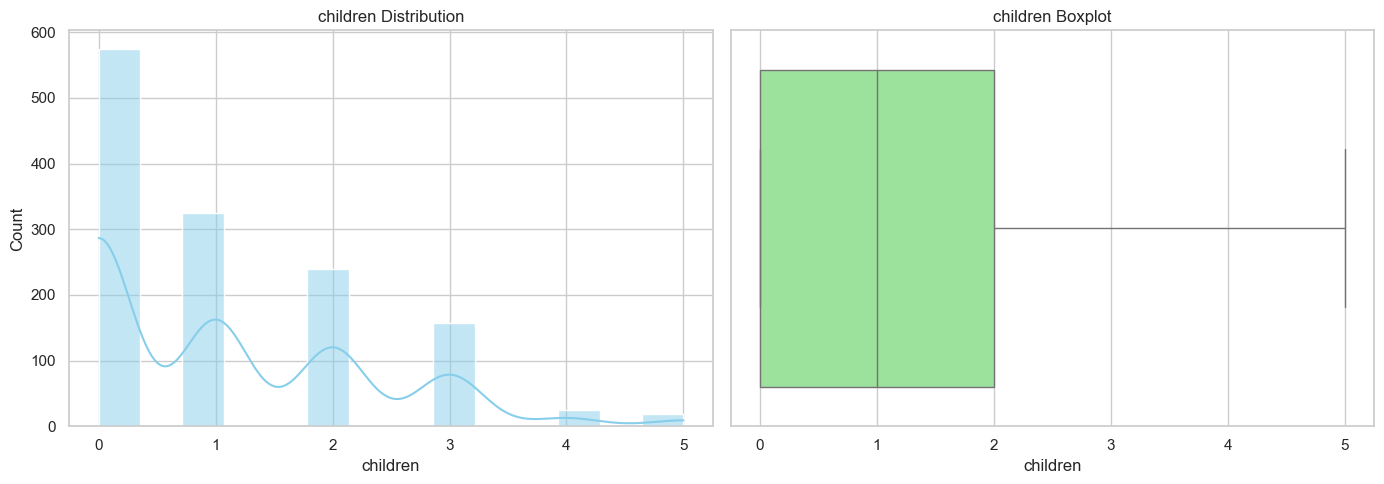

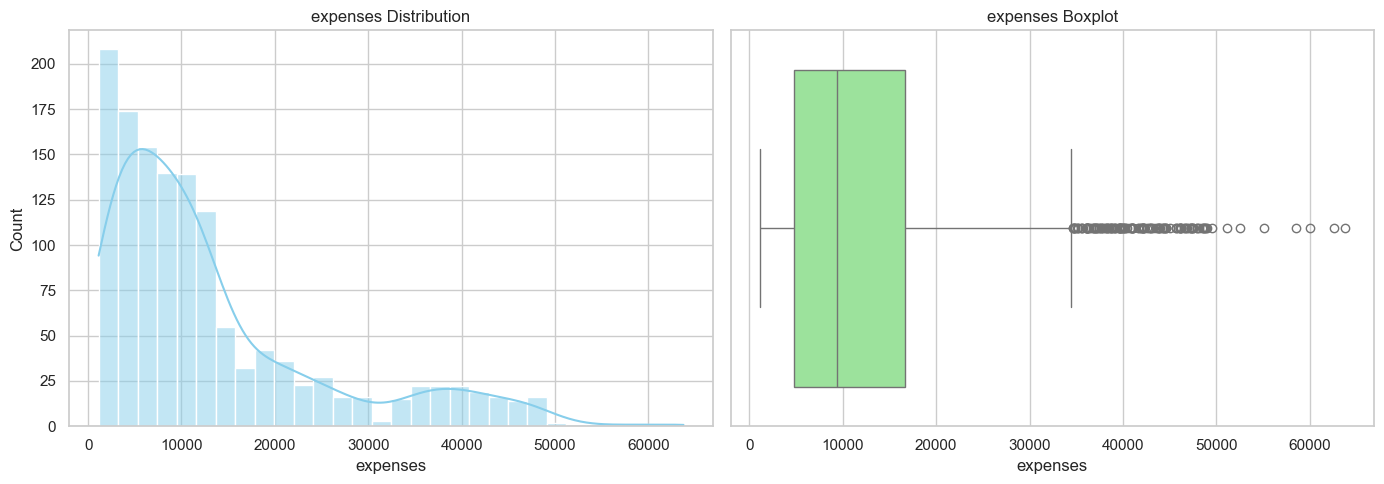

In [35]:
numerical_cols = ['age', 'bmi', 'children', 'expenses']

# Histograms and Boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(14, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
    
    plt.tight_layout()
    plt.show()


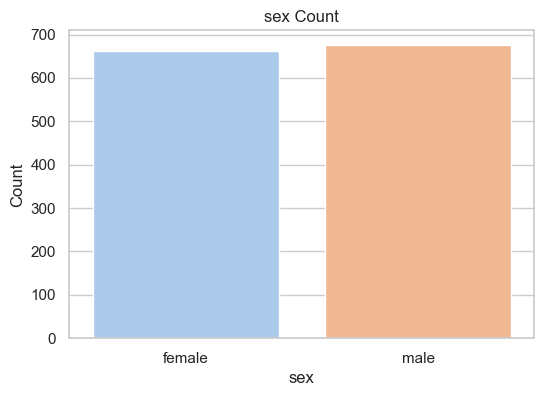

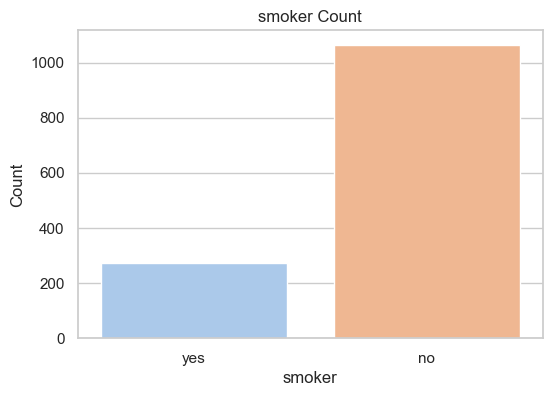

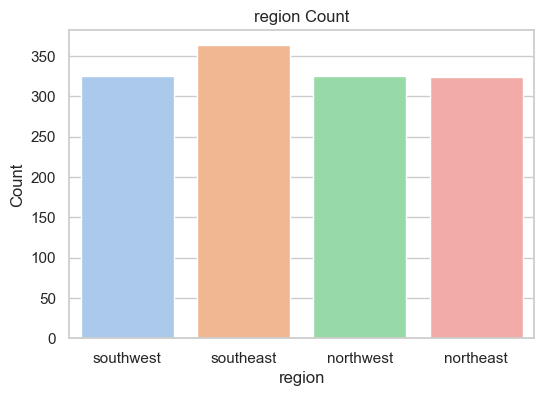

In [36]:
categorical_cols = ['sex', 'smoker', 'region']

# Count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


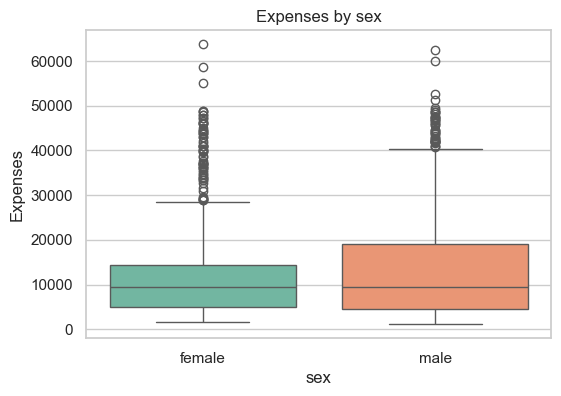

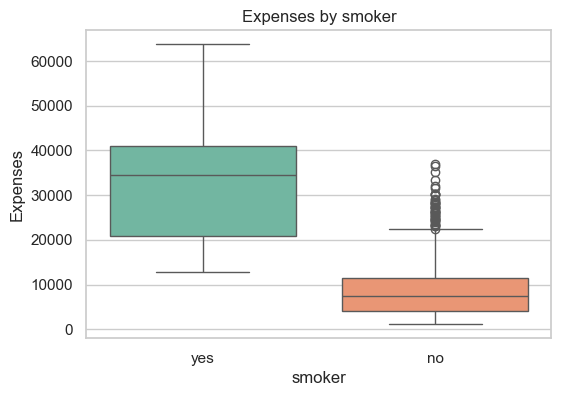

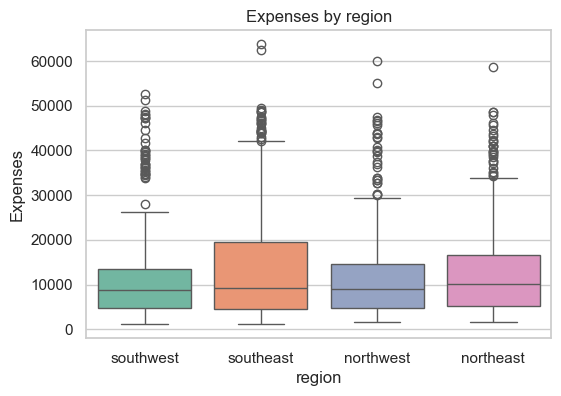

In [37]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y='expenses', data=df, palette='Set2')
    plt.title(f'Expenses by {col}')
    plt.xlabel(col)
    plt.ylabel('Expenses')
    plt.show()


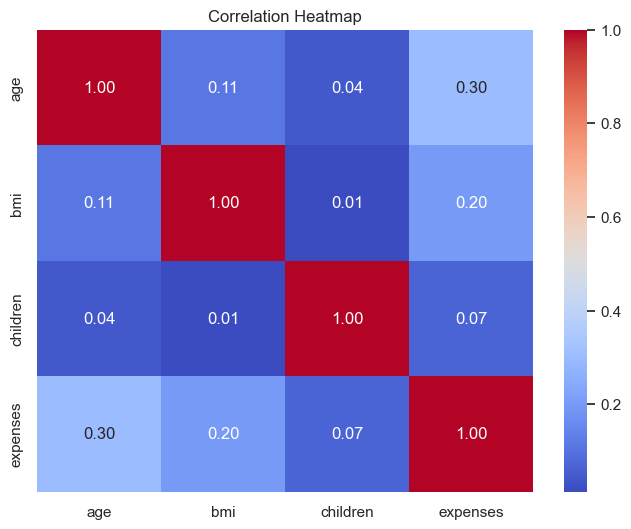

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
